In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile, qasm2, qasm3
from qiskit_aer import Aer
from qiskit.primitives import BackendSampler
from qiskit.providers.basic_provider import BasicProvider # instead of BasicAer
import Our_Qiskit_Functions as oq
import numpy as np
import math as m
import random
import matplotlib
import matplotlib.pyplot as plt
S_simulator = Aer.backends(name='statevector_simulator')[0]

In [2]:
def Letter_Code(x):
    '''
    Input: integer --> Converts an integer between 0 and 26 into a letter of the alphabet (26 for space)
    Input: string --> Converts a lower case letter or space to an integer
    '''
    if( type(x) == type(1) ):
        code = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',' ']
        if( x < len(code) ):
            return code[x]
        else:
            return '?'
    if( type(x) == type('s') ):
        code = {'a':0,'b':1,'c':2,'d':3,'e':4,'f':5,'g':6,'h':7,'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15,'q':16,'r':17,'s':18,'t':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25,' ':26}
    return code[x]
#====================================
p = 3
q = 11
n = p*q
e = 3
d = 7
message = 'hello qubits how are you'
#------------------------------------ Encrypt the message
M = list(message)
M_rsa = []
for i in np.arange(len(M)):
    M[i] = Letter_Code(M[i])
    M_rsa.append( M[i]**e%n )
#------------------------------------ Decrypt the message
encrypted_message = ''
decrypted_message = ''
for j in np.arange(len(M_rsa)):
    encrypted_message = encrypted_message+Letter_Code( M_rsa[j] )
    decrypted_message = decrypted_message+Letter_Code( (M_rsa[j]**d)%n )
print(' Encoded Messege: ',M,'\n\nEncrypted Message: ',M_rsa,'\n\n ',encrypted_message,'\n\nDecrypted Message: ', decrypted_message)

 Encoded Messege:  [7, 4, 11, 11, 14, 26, 16, 20, 1, 8, 19, 18, 26, 7, 14, 22, 26, 0, 17, 4, 26, 24, 14, 20] 

Encrypted Message:  [13, 31, 11, 11, 5, 20, 4, 14, 1, 17, 28, 24, 20, 13, 5, 22, 20, 0, 29, 31, 20, 30, 5, 14] 

  n?llfueobr?yunfwua??u?fo 

Decrypted Message:  hello qubits how are you


In [3]:
N = 1703
#N = 1827
S = int(m.ceil(m.sqrt(N)))
#====================
i = 0
found = False
while i<10000:
    Y2 = (S+i)**2 % N
    Y = m.sqrt(Y2)
    if( ( Y == m.floor(Y) ) and (Y2!=1) ):
        found = True
        X = int(S+i)
        X2 = X**2
        break
    else:
        i = i + 1
if( found==True ):
    print('N: ',N)
    print('\nX: ', X, ' Y: ',Y)
    print('\nX^2: ',X2,' Y^2: ',Y2)
    print('\n(X+Y): ',int(X+Y),' (X-Y): ',int(X-Y))
    print('\nfactors of N: ',int(oq.GCD(N,X+Y)),' ',int(oq.GCD(N,X-Y)) )


N:  1703

X:  98  Y:  33.0

X^2:  9604  Y^2:  1089

(X+Y):  131  (X-Y):  65

factors of N:  131   13


In [4]:
A_i = 462
B_i = 70
#---------------------
gcd = False
GCD = 0
#=====================
A = A_i
B = B_i
while( gcd == False ):
    r = A - B
    print('A: ',A,' B: ',B,' r:',r)
    if( r == 0 ):
        gcd = True
        GCD = B
    else:
        if( r > B ):
            A = r
        else:
            A = B
            B = r
print('------------------------------------------------------\nGreatest Common Denominator between',A_i,'and',B_i,': ',GCD)

A:  462  B:  70  r: 392
A:  392  B:  70  r: 322
A:  322  B:  70  r: 252
A:  252  B:  70  r: 182
A:  182  B:  70  r: 112
A:  112  B:  70  r: 42
A:  70  B:  42  r: 28
A:  42  B:  28  r: 14
A:  28  B:  14  r: 14
A:  14  B:  14  r: 0
------------------------------------------------------
Greatest Common Denominator between 462 and 70 :  14


In [5]:
A = 123456
B = 789
print( A % B )

372


In [6]:
oq.Euclids_Alg(A_i, B_i)

14

In [7]:
N = 35
a = int( random.randint(2,N-2) )
print('N: ',N)
print('a: ',a)

N:  35
a:  27


In [8]:
gcd = oq.Euclids_Alg(N,a)
if(gcd > 1):
    print('a has a common factor with N ---> GCD: ',gcd)
else:
    print('a has no common factor with N ---> GCD: ',gcd)

a has no common factor with N ---> GCD:  1


In [9]:
r = oq.r_Finder(a,N)
print('period r: ',r)
print('\nVerify ',a,'^',r,' = 1 (mod ',N,'): ',(a**r)%N)

period r:  4

Verify  27 ^ 4  = 1 (mod  35 ):  1


In [10]:
if( ((r)%2 == 0) and ( a**(int(r/2))%N != int(N-1) )):
    print('r is a good, proceed')
else:
    print('r is not good, start over')
    if((r)%2 != 0):
        print('r is odd: ',r)
    if(a**(int(r/2))%N == int(N-1)):
        print('a^(r/2) (mod N) = N-1')

r is a good, proceed


In [11]:
print('a^(r/2): ',int(a**(r/2.0)))
factor1 = oq.Euclids_Alg(int(a**(r/2.0)+1),N)
factor2 = oq.Euclids_Alg(int(a**(r/2.0)-1),N)
print('\nfactors of N: ',int(factor1),' ',int(factor2),' ( N is',N,')')

a^(r/2):  729

factors of N:  5   7  ( N is 35 )


In [16]:
N = 35
a = int( random.randint(2,N-2) )
print('a: ',a)
#-------------------------------#
if( oq.Euclids_Alg(N,a) == 1 ):
    r = oq.r_Finder(a,N)
    print( 'r: ',r )
    if( ((r)%2 == 0) and (a**(int(r/2))%N != int(N-1) )):
        print('\nfactors of N: ',int(oq.Euclids_Alg(int(a**(r/2.0)+1),N)),' ',int(oq.Euclids_Alg(int(a**(r/2.0)-1),N)),' ( N is',N,')')
    else:
        if((r)%2 != 0):
            print('Condition Not Satisfied: r is odd: ',r)
        if(a**(int(r/2))%N == int(N-1)):
            print('Condition Not Satisfied: a^(r/2) (mod N) = N-1: ',a**(int(r/2))%N)
else:
    print('a has a GCD with N: ',oq.Euclids_Alg(N,a))

a:  23
r:  12

factors of N:  5   7  ( N is 35 )


In [17]:
N = 35
coprimes = [4,6,8,9,11,13,16]
a = coprimes[int( random.randint(0,len(coprimes)-1) )]
print('N = ',N,' a = ',a,'\n')
#-------------------------------
for i in np.arange(10):
    mod_N = a**int(i) % N
    print('a^',i,' (mod N): ',mod_N)

N =  35  a =  4 

a^ 0  (mod N):  1
a^ 1  (mod N):  4
a^ 2  (mod N):  16
a^ 3  (mod N):  29
a^ 4  (mod N):  11
a^ 5  (mod N):  9
a^ 6  (mod N):  1
a^ 7  (mod N):  4
a^ 8  (mod N):  16
a^ 9  (mod N):  29


In [18]:
S1 = [round(random.random()),round(random.random()),round(random.random()),round(random.random())]
a = 8
N = 15
print('N: ',N,' a: ',a)
#====================================
q1 = QuantumRegister(4,name='q1')
q2 = QuantumRegister(4,name='q2')
qc = QuantumCircuit(q1,q2,name='qc')
#------------------------------------
for i in np.arange(4):
    if(S1[i]==1):
        qc.x( q1[int(i)] )
print('\n_____ Initial State _____')
oq.Wavefunction(qc,systems=[4,4])
#------------------------------------
S1_num = S1[0] + 2*S1[1] + 4*S1[2] + 8*S1[3]
S2_num = a**(S1_num) % N
print('\nState 1: ',S1_num,' Desired State 2: ',a,'^',S1_num,' ( mod ',N,') = ',S2_num)
#------------------------------------
for j in np.arange(4):
    if( S2_num >= 2**(3-j) ):
        qc.x( q2[int(3-j)] )
        S2_num = S2_num - 2**(3-j)
print('\n_____ After Modulo Operation_____')
oq.Wavefunction(qc,systems=[4,4]);

N:  15  a:  8

_____ Initial State _____
1.0  |0100>|0000>   

State 1:  2  Desired State 2:  8 ^ 2  ( mod  15 ) =  4

_____ After Modulo Operation_____
1.0  |0100>|0010>   


In [19]:
a = 8
N = 15
q1_state = [1,0,1,0]
q2_state = oq.BinaryL( a**(int( oq.From_BinaryLSB(q1_state,'L') ))%N, 2**4 )
print('a = ',a,' N = ',N)
print('\nInput State: ',q1_state,' Desired Modulo State: ',q2_state)
#=====================================
q1 = QuantumRegister(4,name='q1')
q2 = QuantumRegister(4,name='q2')
an = QuantumRegister(3,name='a')
qc = QuantumCircuit(q1,q2,an,name='qc')
#--------------------------------------
qc.h(q1[0])
qc.h(q1[2])
qc.cx( q1[0], q1[1] )
qc.cx( q1[2], q1[1])
print('\n_____ Initial State _____')
oq.Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False])
qc.barrier()
#-------------------------------------- |1010> state
oq.X_Transformation(qc,q1,q1_state)
qc.ccx( q1[0], q1[1], an[0] )
qc.ccx( q1[2], an[0], an[1] )
qc.ccx( q1[3], an[1], an[2] )
for i in np.arange(len(q2_state)):
    if( q2_state[i]==1 ):
        qc.cx( an[2], q2[int(i)] )
qc.ccx( q1[3], an[1], an[2] )
qc.ccx( q1[2], an[0], an[1] )
qc.ccx( q1[0], q1[1], an[0] )
oq.X_Transformation(qc,q1,q1_state)
print('\n_____ After Modulo Operation _____')
oq.Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False])
print(qc)

a =  8  N =  15

Input State:  [1, 0, 1, 0]  Desired Modulo State:  [0, 0, 0, 1]

_____ Initial State _____
0.5  |0000>|0000>   0.5  |1100>|0000>   0.5  |1010>|0000>   0.5  |0110>|0000>   

_____ After Modulo Operation _____
0.5  |0000>|0000>   0.5  |1100>|0000>   0.5  |0110>|0000>   0.5  |1010>|0001>   
      ┌───┐           ░                                                   
q1_0: ┤ H ├──■────────░────────■──────────────────────────────────■───────
      └───┘┌─┴─┐┌───┐ ░ ┌───┐  │                                  │  ┌───┐
q1_1: ─────┤ X ├┤ X ├─░─┤ X ├──■──────────────────────────────────■──┤ X ├
      ┌───┐└───┘└─┬─┘ ░ └───┘  │                                  │  └───┘
q1_2: ┤ H ├───────■───░────────┼────■───────────────────■─────────┼───────
      └───┘           ░ ┌───┐  │    │                   │  ┌───┐  │       
q1_3: ────────────────░─┤ X ├──┼────┼────■─────────■────┼──┤ X ├──┼───────
                      ░ └───┘  │    │    │         │    │  └───┘  │       
q2_0: ─────────────

In [20]:
a = 8
N = 15
Q = 4
print('a: ',a,' N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
qc = QuantumCircuit(q1,q2,an,name='qc')
#--------------------------------------
for i in np.arange(Q):
    qc.h(q1[int(i)])
print('\n_____ Initial State _____')
oq.Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False])
oq.Mod_Op(Q,qc,q1,q2,an,a,N)
print('\n_____ After Modulo Operation _____')
oq.Wavefunction(qc,systems=[4,4,3],show_systems=[True,True,False]);

a:  8  N:  15

_____ Initial State _____
0.25  |0000>|0000>   0.25  |1000>|0000>   0.25  |0100>|0000>   0.25  |1100>|0000>   0.25  |0010>|0000>   0.25  |1010>|0000>   0.25  |0110>|0000>   0.25  |1110>|0000>   0.25  |0001>|0000>   0.25  |1001>|0000>   0.25  |0101>|0000>   0.25  |1101>|0000>   0.25  |0011>|0000>   0.25  |1011>|0000>   0.25  |0111>|0000>   0.25  |1111>|0000>   

_____ After Modulo Operation _____
0.25  |1100>|1000>   0.25  |1110>|1000>   0.25  |1101>|1000>   0.25  |1111>|1000>   0.25  |0100>|0100>   0.25  |0110>|0100>   0.25  |0101>|0100>   0.25  |0111>|0100>   0.25  |1000>|0010>   0.25  |1010>|0010>   0.25  |1001>|0010>   0.25  |1011>|0010>   0.25  |0000>|0001>   0.25  |0010>|0001>   0.25  |0001>|0001>   0.25  |0011>|0001>   


In [21]:
a = 8
N = 15
Q = 4
print('a: ',a,' N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
c = ClassicalRegister(Q,name='c')
qc = QuantumCircuit(q1,q2,an,c,name='qc')
#--------------------------------------
for i in np.arange(Q):
    qc.h(q1[int(i)])
print('\n_____ Initial State _____')
oq.Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])
oq.Mod_Op(Q,qc,q1,q2,an,a,N)
print('\n_____ After Modulo Operation _____')
oq.Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])
qc.measure(q2,c)
print('\n_____ After Partial Measurement _____')
oq.Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False]);

a:  8  N:  15

_____ Initial State _____
0.25  |0000>|0000>   0.25  |1000>|0000>   0.25  |0100>|0000>   0.25  |1100>|0000>   0.25  |0010>|0000>   0.25  |1010>|0000>   0.25  |0110>|0000>   0.25  |1110>|0000>   0.25  |0001>|0000>   0.25  |1001>|0000>   0.25  |0101>|0000>   0.25  |1101>|0000>   0.25  |0011>|0000>   0.25  |1011>|0000>   0.25  |0111>|0000>   0.25  |1111>|0000>   

_____ After Modulo Operation _____
0.25  |1100>|1000>   0.25  |1110>|1000>   0.25  |1101>|1000>   0.25  |1111>|1000>   0.25  |0100>|0100>   0.25  |0110>|0100>   0.25  |0101>|0100>   0.25  |0111>|0100>   0.25  |1000>|0010>   0.25  |1010>|0010>   0.25  |1001>|0010>   0.25  |1011>|0010>   0.25  |0000>|0001>   0.25  |0010>|0001>   0.25  |0001>|0001>   0.25  |0011>|0001>   

_____ After Partial Measurement _____
0.5  |0000>|0001>   0.5  |0010>|0001>   0.5  |0001>|0001>   0.5  |0011>|0001>   


In [22]:
k = 3
r = 5
a0 = int( (r)*random.random() )
L = k*r
C = np.zeros(r)
C[a0] = 1
print('k = ',k,' r = ',r,' a0 = ',a0,'\n\nOne Cycle: ',C,' L = ',L)
#------------------------------------------
f = []
for i in np.arange(k):
    for i2 in np.arange(r):
        f.append( int( C[i2] ) )
print('\nPeriodic Function: ',f)
F = oq.DFT(f,inverse=True)
print('\nAfter DFT\u2020: ',F)
#------------------------------------------
F2 = []
for j in np.arange( len(F) ):
    F2.append( round(abs(F[j]),3) )
print('\n |F|: ',F2 )

k =  3  r =  5  a0 =  0 

One Cycle:  [1. 0. 0. 0. 0.]  L =  15

Periodic Function:  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]

After DFT†:  [3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0]

 |F|:  [3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0, 3.0, 0, 0]


In [23]:
k = int( 2+4*random.random() )
r = int( 2+4*random.random() )
L = k*r
print('k: ',k,' r: ',r,' L: ',L,'\n------------------------------\n')
#================================================
for q in np.arange(L):
    n = int(q)
    Q = 0
    for j in np.arange(k):
        Q = Q + np.exp( ((-2*m.pi*1.0j)/L) * n * j * r )
    print( 'n: ',n,' \u03A3 = ',round( Q.real,5 ),' + i',round(Q.imag,5) )

k:  3  r:  2  L:  6 
------------------------------

n:  0  Σ =  3.0  + i 0.0
n:  1  Σ =  -0.0  + i -0.0
n:  2  Σ =  0.0  + i -0.0
n:  3  Σ =  3.0  + i 0.0
n:  4  Σ =  -0.0  + i -0.0
n:  5  Σ =  0.0  + i -0.0


k:  5  r:  4  L:  20  a0:  0 
--------------------------------------------

x_0 QFT term:  5.0  + i 0.0


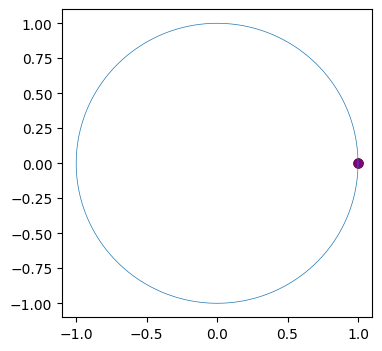

x_1 QFT term:  -0.0  + i -0.0


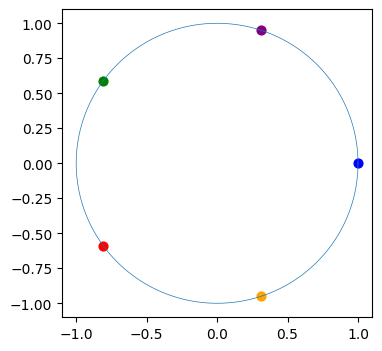

x_2 QFT term:  0.0  + i -0.0


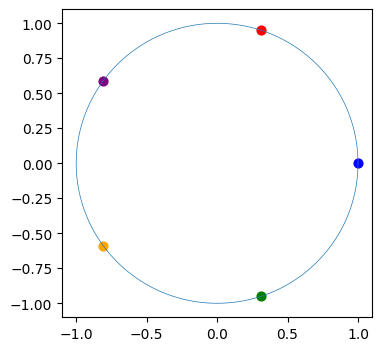

x_3 QFT term:  0.0  + i -0.0


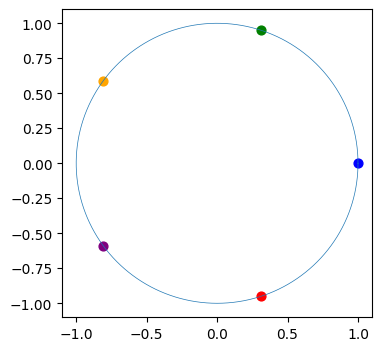

x_4 QFT term:  0.0  + i -0.0


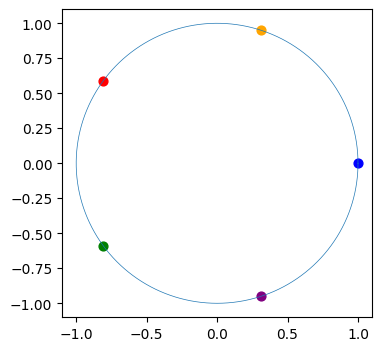

x_5 QFT term:  5.0  + i 0.0


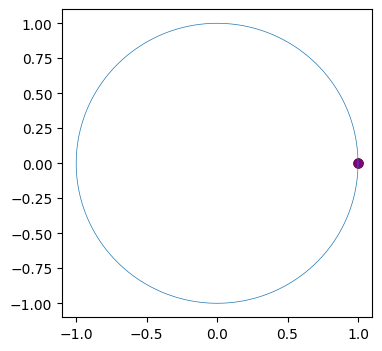

x_6 QFT term:  -0.0  + i -0.0


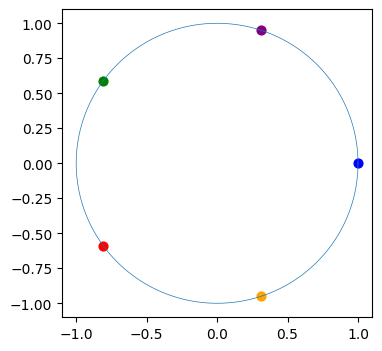

x_7 QFT term:  -0.0  + i -0.0


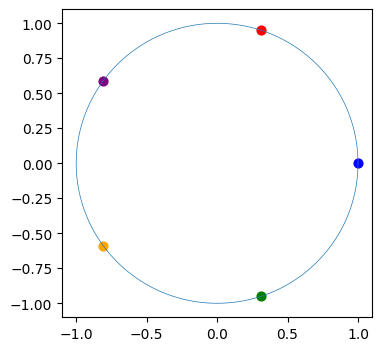

x_8 QFT term:  0.0  + i -0.0


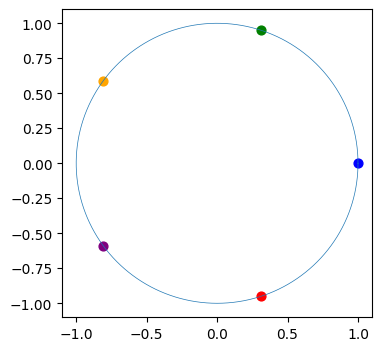

x_9 QFT term:  0.0  + i -0.0


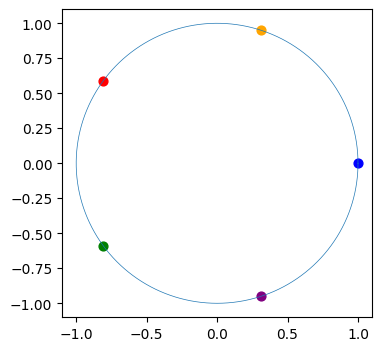

x_10 QFT term:  5.0  + i 0.0


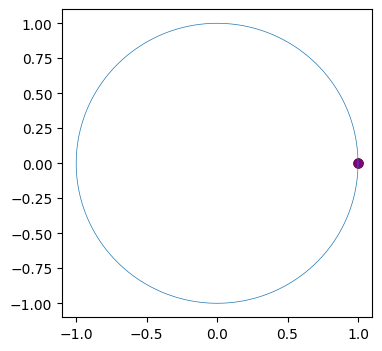

x_11 QFT term:  -0.0  + i -0.0


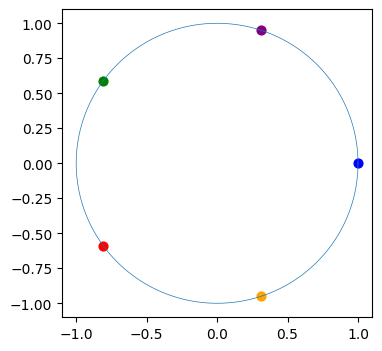

x_12 QFT term:  -0.0  + i -0.0


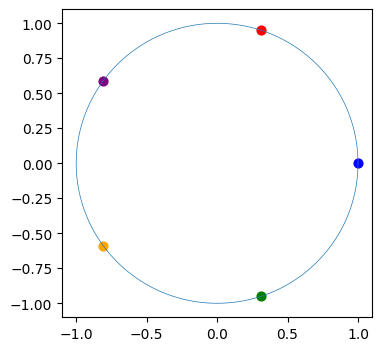

x_13 QFT term:  0.0  + i -0.0


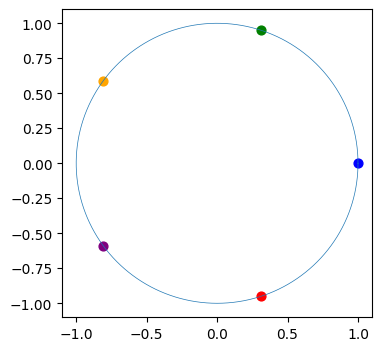

x_14 QFT term:  0.0  + i -0.0


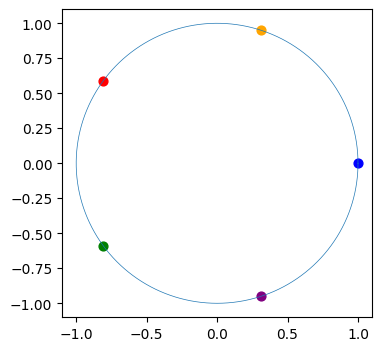

x_15 QFT term:  5.0  + i 0.0


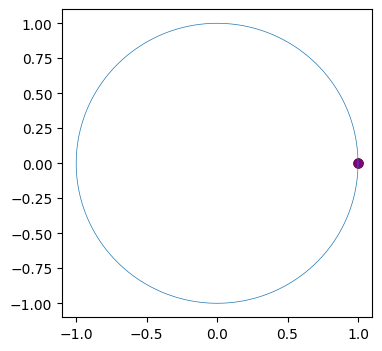

x_16 QFT term:  -0.0  + i -0.0


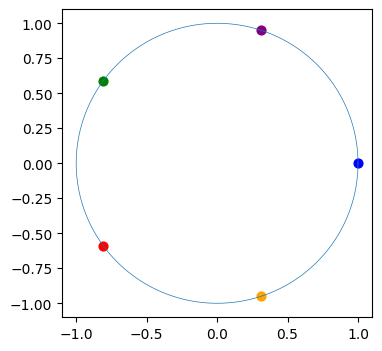

x_17 QFT term:  0.0  + i 0.0


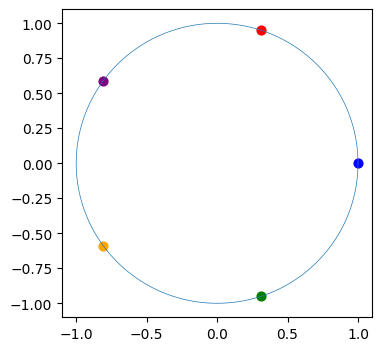

x_18 QFT term:  0.0  + i -0.0


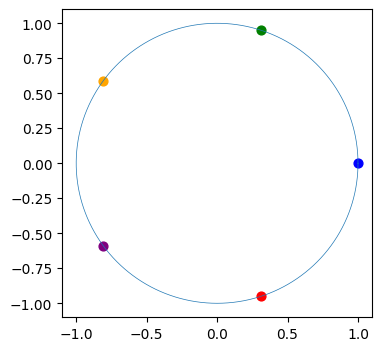

x_19 QFT term:  -0.0  + i 0.0


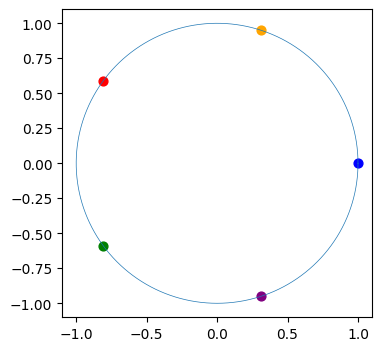

In [24]:
N_circle = 1000
x_c = []
y_c = []
#-----------------
for c in np.arange(N_circle+1):
    t = (2*m.pi*c)/N_circle
    x_c.append( np.cos(t) )
    y_c.append( np.sin(t) )
#=================================================
k = 5
r = 4
L = k*r
a0= int(r*random.random())
print('k: ',k,' r: ',r,' L: ',L,' a0: ',a0,'\n--------------------------------------------\n')
for i in np.arange(L):
    p1 = np.exp( (-2*m.pi*1.0j/L) * (a0+0*r) * i)
    p2 = np.exp( (-2*m.pi*1.0j/L) * (a0+1*r) * i)
    p3 = np.exp( (-2*m.pi*1.0j/L) * (a0+2*r) * i)
    p4 = np.exp( (-2*m.pi*1.0j/L) * (a0+3*r) * i)
    p5 = np.exp( (-2*m.pi*1.0j/L) * (a0+4*r) * i)
#=======================
    print('x_'+str(int(i))+' QFT term: ',round((p1+p2+p3+p4+p5).real,4),' + i',round((p1+p2+p3+p4+p5).imag,4))
    fig = plt.figure(figsize=(4,4))
    plt.scatter( p1.real,p1.imag,s=40,color='blue' )
    plt.scatter( p2.real,p2.imag,s=40,color='orange' )
    plt.scatter( p3.real,p3.imag,s=40,color='red' )
    plt.scatter( p4.real,p4.imag,s=40,color='green' )
    plt.scatter( p5.real,p5.imag,s=40,color='purple' )
    plt.plot( x_c,y_c,linewidth=0.5 )
    plt.show()

In [25]:
a = 8
N = 15
Q = 4
print('a: ',a,' N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
c = ClassicalRegister(Q,name='c')
qc = QuantumCircuit(q1,q2,an,c,name='qc')
#--------------------------------------
for i in np.arange(Q):
    qc.h(q1[int(i)])
print('\n_____ Initial State _____')
oq.Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])
oq.Mod_Op(Q,qc,q1,q2,an,a,N)
print('\n_____ After Modulo Operation _____')
oq.Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])
qc.measure(q2,c)
oq.QFT_dgr(qc,q1,Q)
print('\n_____ Partial Measurement + QFT\u2020_____')
oq.Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False]);

a:  8  N:  15

_____ Initial State _____
0.25  |0000>|0000>   0.25  |1000>|0000>   0.25  |0100>|0000>   0.25  |1100>|0000>   0.25  |0010>|0000>   0.25  |1010>|0000>   0.25  |0110>|0000>   0.25  |1110>|0000>   0.25  |0001>|0000>   0.25  |1001>|0000>   0.25  |0101>|0000>   0.25  |1101>|0000>   0.25  |0011>|0000>   0.25  |1011>|0000>   0.25  |0111>|0000>   0.25  |1111>|0000>   

_____ After Modulo Operation _____
0.25  |1100>|1000>   0.25  |1110>|1000>   0.25  |1101>|1000>   0.25  |1111>|1000>   0.25  |0100>|0100>   0.25  |0110>|0100>   0.25  |0101>|0100>   0.25  |0111>|0100>   0.25  |1000>|0010>   0.25  |1010>|0010>   0.25  |1001>|0010>   0.25  |1011>|0010>   0.25  |0000>|0001>   0.25  |0010>|0001>   0.25  |0001>|0001>   0.25  |0011>|0001>   

_____ Partial Measurement + QFT†_____
0.5  |0000>|0100>   0.5  |1000>|0100>   -0.5  |0100>|0100>   -0.5  |1100>|0100>   


In [26]:
N = 2.815
#=====================================
q,p,a = oq.ConFrac(N, return_a=True)
print('N = ',N,' = ',p,'/',q)
print('\na constants: ',a)
#-------------------------------------
accuracy = 4
q,p,a = oq.ConFrac(N, a_max=accuracy, return_a=True)
print('\n--------------------------------------\nN = ',N,' \u2248 ',p,'/',q)
print('\na constants: ',a)

N =  2.815  =  563 / 200

a constants:  [2, 1, 4, 2, 2, 7]

--------------------------------------
N =  2.815  ≈  31 / 11

a constants:  [2, 1, 4, 2]


In [27]:
a = 8
N = 15
Q = 4
print('a: ',a,' N: ',N)
#=====================================
q1 = QuantumRegister(Q,name='q1')
q2 = QuantumRegister(Q,name='q2')
an = QuantumRegister(Q-1,name='a')
c1 = ClassicalRegister(Q,name='c1')
c2 = ClassicalRegister(Q,name='c2')
qc = QuantumCircuit(q1,q2,an,c1,c2,name='qc')
#--------------------------------------
for i in np.arange(Q):
    qc.h(q1[int(i)])
oq.Mod_Op(Q,qc,q1,q2,an,a,N)
print('\n_____ After Modulo Operation _____')
oq.Wavefunction(qc,systems=[Q,Q,Q-1],show_systems=[True,True,False])
qc.measure(q2,c2)
oq.QFT_dgr(qc,q1,Q)
qc.measure(q1,c1)
M = oq.Measurement(qc,shots=1,print_M=False,return_M=True)
print('\n Partial Measurement: |'+list(M.keys())[0][4:8]+'>')
print('\nSystem One Measurement: |'+list(M.keys())[0][0:4]+'>')
#--------------------------------------
S = int(oq.From_Binary(list(list(M.keys())[0][0:4])))
L = 2**Q
print('\nS = ',S,' L = ',L)
if( S != 0 ):
    r,mult = oq.ConFrac(1.0*S/L)
    print('\nContinued Fractions Result: m = ',mult,' r = ',r)

a:  8  N:  15

_____ After Modulo Operation _____
0.25  |1100>|1000>   0.25  |1110>|1000>   0.25  |1101>|1000>   0.25  |1111>|1000>   0.25  |0100>|0100>   0.25  |0110>|0100>   0.25  |0101>|0100>   0.25  |0111>|0100>   0.25  |1000>|0010>   0.25  |1010>|0010>   0.25  |1001>|0010>   0.25  |1011>|0010>   0.25  |0000>|0001>   0.25  |0010>|0001>   0.25  |0001>|0001>   0.25  |0011>|0001>   

 Partial Measurement: | 100>

System One Measurement: |0100>

S =  4  L =  16

Continued Fractions Result: m =  1  r =  4


In [28]:
k = int( 2+4*random.random() )
r = int( 2+4*random.random() )
L = k*r + 1
print('k: ',k,' r: ',r,' L: ',L,'\n------------------------------\n')
#================================================
for q in np.arange(L):
    n = int(q)
    Q = 0
    for j in np.arange(k):
        Q = Q + np.exp( ((-2*m.pi*1.0j)/L) * n * j * r )
    print( 'n: ',n,' \u03A3 = ',round( Q.real,5 ),' + i',round(Q.imag,5) )


k:  2  r:  5  L:  11 
------------------------------

n:  0  Σ =  2.0  + i 0.0
n:  1  Σ =  0.04051  + i -0.28173
n:  2  Σ =  1.84125  + i 0.54064
n:  3  Σ =  0.34514  + i -0.75575
n:  4  Σ =  1.41542  + i 0.90963
n:  5  Σ =  0.85769  + i -0.98982
n:  6  Σ =  0.85769  + i 0.98982
n:  7  Σ =  1.41542  + i -0.90963
n:  8  Σ =  0.34514  + i 0.75575
n:  9  Σ =  1.84125  + i -0.54064
n:  10  Σ =  0.04051  + i 0.28173


k =  4  r =  3  a0 =  1


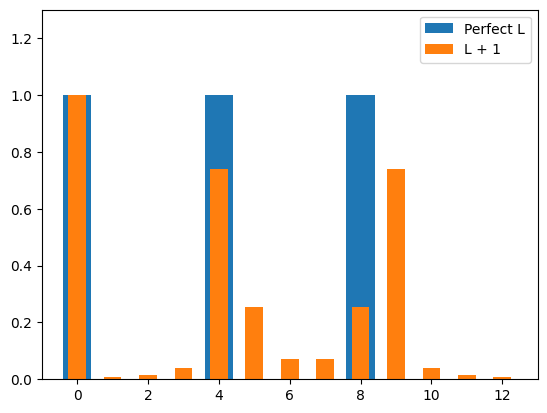

In [29]:
k = int( 4 + 2*random.random() )
r = int( 3 + 5*random.random() )
a0 = int( (r-1)*random.random() )
print('k = ',k,' r = ',r,' a0 = ',a0)
#------------------------------------------
L = k*r
C = np.zeros(r)
C[a0] = 1
#------------------------------------------
f1 = []
f2 = []
for i in np.arange(k):
    for i2 in np.arange(r):
        f1.append( C[i2] )
        f2.append( C[i2] )
f2.append(0)
F1 = oq.DFT(f1,inverse=True)
F2 = oq.DFT(f2,inverse=True)
for q in np.arange( len(F1) ):
    F1[q] = round( abs(F1[q]/k)**2 ,4)
    F2[q] = round( abs(F2[q]/k)**2 ,4)
F2[-1] = round( abs(F2[-1]/k)**2 ,4)
#==========================================
x_bar = []
for j in np.arange(len(F1)):
    x_bar.append(int(j))
plt.bar(x_bar,F1)
x_bar.append(int(j+1))
plt.bar(x_bar,F2,width=0.5)
plt.legend(['Perfect L','L + 1'])
plt.axis([-1, len(F2), 0, 1.3])
plt.show()


In [30]:
r = 7
L = 36
print('r: ',r,' L: ',L,'\n==============================')
#=====================
S = 10
print('\nS = ',S,'\n-----------------------------')
for i in np.arange(4):
    q,p = oq.ConFrac(S/L,a_max=int(i+2))
    print('order ',int(i+1),' Continued Fractions: '+str(p)+'/'+str(q),' \u2248 ',round(p/q,4))
#---------------------
S = 21
print('\nS = ',S)
for i in np.arange(4):
    q,p = oq.ConFrac(S/L,a_max=int(i+2))
    print('order ',int(i+1),' Continued Fractions: '+str(p)+'/'+str(q),' \u2248 ',round(p/q,4))


r:  7  L:  36 

S =  10 
-----------------------------
order  1  Continued Fractions: 1/3  ≈  0.3333
order  2  Continued Fractions: 1/4  ≈  0.25
order  3  Continued Fractions: 2/7  ≈  0.2857
order  4  Continued Fractions: 5/18  ≈  0.2778

S =  21
order  1  Continued Fractions: 1/1  ≈  1.0
order  2  Continued Fractions: 1/2  ≈  0.5
order  3  Continued Fractions: 3/5  ≈  0.6
order  4  Continued Fractions: 7/12  ≈  0.5833


In [31]:
S = 21
L = 36
order = 4
#==================
for i in np.arange(3):
    S_new = int( S - 1 + i)
    for j in np.arange(3):
        L_new = int( L - 1 + j)
        if( (S_new!=S) or (L_new!=L) ):
            print('\nS = ',S_new,' L = ',L_new,'\n-----------------------------')
            for i in np.arange(4):
                q,p = oq.ConFrac(S_new/L_new,a_max=int(i+2))
                print('order ',int(i+1),' Continued Fractions: '+str(p)+'/'+str(q),' \u2248 ',round(p/q,4))



S =  20  L =  35 
-----------------------------
order  1  Continued Fractions: 1/1  ≈  1.0
order  2  Continued Fractions: 1/2  ≈  0.5
order  3  Continued Fractions: 4/7  ≈  0.5714
order  4  Continued Fractions: 4/7  ≈  0.5714

S =  20  L =  36 
-----------------------------
order  1  Continued Fractions: 1/1  ≈  1.0
order  2  Continued Fractions: 1/2  ≈  0.5
order  3  Continued Fractions: 4/7  ≈  0.5714
order  4  Continued Fractions: 5/9  ≈  0.5556

S =  20  L =  37 
-----------------------------
order  1  Continued Fractions: 1/1  ≈  1.0
order  2  Continued Fractions: 1/2  ≈  0.5
order  3  Continued Fractions: 6/11  ≈  0.5455
order  4  Continued Fractions: 7/13  ≈  0.5385

S =  21  L =  35 
-----------------------------
order  1  Continued Fractions: 1/1  ≈  1.0
order  2  Continued Fractions: 1/2  ≈  0.5
order  3  Continued Fractions: 3/5  ≈  0.6
order  4  Continued Fractions: 3/5  ≈  0.6

S =  21  L =  37 
-----------------------------
order  1  Continued Fractions: 1/1  ≈  1.0
orde

In [32]:
N = 55
#N=11*13
Q = m.ceil( m.log(N,2) )
nrQubits = 3*Q - 1
print("Number of qubits: ", nrQubits)
L = 2**Q
a = int( 2+ (N-3)*random.random() )
r = oq.r_Finder(a,N)
#=================================================
print('N = ',N,' Q = ',Q,' a = ',a,' Searching For: r =',r)
if( oq.Euclids_Alg(a,N) > 1 ):
    print('\na happens to have a factor in common with N: ',oq.Euclids_Alg(a,N))
else:
    q1 = QuantumRegister(Q,name='q1')
    q2 = QuantumRegister(Q,name='q2')
    an = QuantumRegister(Q-1,name='a')
    c1 = ClassicalRegister(Q,name='c1')
    c2 = ClassicalRegister(Q,name='c2')
    qc = QuantumCircuit(q1,q2,an,c1,c2,name='qc')
#----------------------------------------------
    for i in np.arange(Q):
        qc.h(q1[int(i)])
        
    oq.Mod_Op(Q,qc,q1,q2,an,a,N)
    
    qc.measure(q2,c2)
    oq.QFT_dgr(qc,q1,Q)
    qc.measure(q1,c1)
    M = oq.Measurement(qc,shots=1,print_M=False,return_M=True)
    S = int(oq.From_Binary(list(list(M.keys())[0][0:Q])))
#----------------------------------------------
    print('\nSystem One Measurement: |'+list(M.keys())[0][0:Q]+'>')
    print('\nS = ',S,' L = ',L)
    if( S!= 0):
        r = oq.Evaluate_S(S,L,a,N)
        if( r!=0 ):
            print('\nFound the period r = ',r)
            if( ((r)%2 == 0) and ( a**(int(r/2))%N != int(N-1) )):
                f1 = oq.Euclids_Alg(int(a**(int(r/2))+1),N)
                f2 = oq.Euclids_Alg(int(a**(int(r/2))-1),N)
                print('\nFactors of N: ',int(f1),' ',int(f2))
            else:
                if( (r)%2 != 0 ):
                    print('\nr does not meet criteria for factoring N: r is not even')
                else:
                    print('\nr does not meet criteria for factoring N: a^(r/2) (mod N) = N-1')
        else:
            print('\nCould not find the period using S, start over')
    else: 
        print('\nMeasured S = 0, start over')

Number of qubits:  17
N =  55  Q =  6  a =  23  Searching For: r = 4

System One Measurement: |110000>

S =  48  L =  64

Found the period r =  4

Factors of N:  5   11
